In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
# Set hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [ ]:
# Load and preprocess the data
train_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
val_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_data_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
#WITH VAL
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Define the model
model = models.Sequential()
model.add(tf.keras.applications.DenseNet169(include_top=False, input_shape=(224, 224, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

51877672/51877672 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)

['densenet169', 'global_average_pooling2d', 'dense']


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d_1   (None, 1664)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 2)                 3330      
                                                                 
Total params: 12,646,210
Trainable params: 12,487,810
Non-trainable params: 158,400
_________________________________________________________________


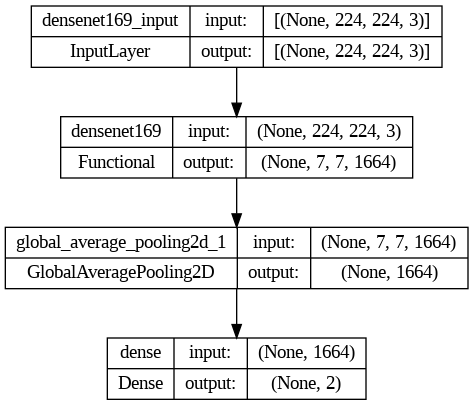

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 16.9 MB/s eta 0:00:00


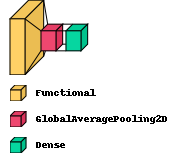

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=15, max_z=15, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Set the checkpoint file path
checkpoint_filepath = '/content/drive/Shareddrives/MobileNetV2/DenseNet/best_DenseNet_model.h5'

In [ ]:
# Train the model
model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator)

Epoch 1/10
27/27 [==============================] - 383s 10s/step - loss: 0.6252 - accuracy: 0.7595 - val_loss: 44.9499 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - 76s 3s/step - loss: 0.2810 - accuracy: 0.8857 - val_loss: 5.9235 - val_accuracy: 0.6278
Epoch 3/10
27/27 [==============================] - 81s 3s/step - loss: 0.2348 - accuracy: 0.9179 - val_loss: 14.1210 - val_accuracy: 0.5000
Epoch 4/10
27/27 [==============================] - 81s 3s/step - loss: 0.1914 - accuracy: 0.9238 - val_loss: 0.8770 - val_accuracy: 0.8500
Epoch 5/10
27/27 [==============================] - 74s 3s/step - loss: 0.1294 - accuracy: 0.9607 - val_loss: 5.2717 - val_accuracy: 0.7111
Epoch 6/10
27/27 [==============================] - 77s 3s/step - loss: 0.1747 - accuracy: 0.9321 - val_loss: 1.7287 - val_accuracy: 0.7389
Epoch 7/10
27/27 [==============================] - 77s 3s/step - loss: 0.1484 - accuracy: 0.9500 - val_loss: 0.6771 - val_accuracy: 0.8556
Epoch 8/10
27/27

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Acc: {test_acc}')

6/6 [==============================] - 39s 8s/step - loss: 1.2512 - accuracy: 0.5111
Test Acc: 0.5111111402511597


In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

6/6 [==============================] - 135s 26s/step - loss: 0.4706 - accuracy: 0.8722
Test accuracy: 0.8722222447395325


In [ ]:
# Save the model
model.save(checkpoint_filepath)